# CP322 ASSIGNMENT 2
## Riley Huston | ID: 190954880
---

## Section 1 | Concept Question

#### Section 1.1 | Expression for the joint likelihood of the network in its factored form

$$P(a, b, c, d, e, f, g) = P(a)*P(b|a)*P(c|b) * P(g)*P(f|g) * P(d|c,f) * P(e|d)$$

#### Section 1.2 | Naive Bayesian Networks

$$P(K = 1|a = 1, b = 1, c = 0) = \frac{0}{1} = 0$$

$$P (K = 0|a = 1, b = 1) = \frac{1}{2} = 0.5$$

## Section 2 | Programming Question: Product Classification

#### Section 2.1 | Data Loading and Preprocessing

In [1]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"otto.csv")

instances = df.shape[0]
classes = df['target'].nunique()

print('Number of Instances:', instances)
print('Number of Classes:', classes)

Number of Instances: 61878
Number of Classes: 9


In [3]:
# Remove all rows with non numeric values
df = df.dropna()

# Make sure all row ids are numeric
def is_num(x):
    return str(x).isdigit()
df = df[df.id.apply(is_num)]

# Find rows with only zeros
row_sums = df.iloc[0:, 1:-1].sum(numeric_only = True, axis=1)

# Create new Dataframe without zero rows named ppdf (preprocessed dataframe)
ppdf = df[row_sums > 0]

In [4]:
# Split the data into features and target
features = ppdf.drop(['target','id'], axis=1).columns

# Split the data into training and test sets
X_Training, X_Testing, y_Training, y_Testing = train_test_split(ppdf[features], ppdf['target'], test_size=0.2)

#### Section 2.2 | Algorithm Implementation

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [6]:
KNN = KNeighborsClassifier()
KNN = KNN.fit(X_Training, y_Training)

RF = RandomForestClassifier(n_estimators = 15, criterion = "entropy", bootstrap = True, max_samples = 1000)
RF = RF.fit(X_Training, y_Training)

Naive_Bayes = GaussianNB()
Naive_Bayes = Naive_Bayes.fit(X_Training, y_Training)


#### Section 2.3 | Performance Comparison

In [7]:
from sklearn import preprocessing 
import seaborn as sn

K-Nearest Neighbour:  0.7776341305753071
      Random Forest:  0.6885100193923723
        Naive Bayes:  0.6217679379444085


<AxesSubplot:>

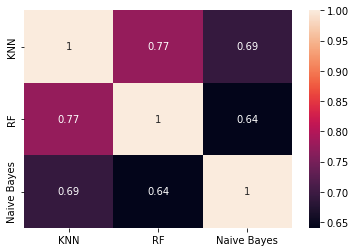

In [8]:
KNN_pred = KNN.predict(X_Testing)
KNN_score = KNN.score(X_Testing, y_Testing)

RF_pred = RF.predict(X_Testing)
RF_score = RF.score(X_Testing, y_Testing)

Naive_pred = Naive_Bayes.predict(X_Testing)
Naive_score = Naive_Bayes.score(X_Testing, y_Testing)

print("K-Nearest Neighbour: ", KNN_score)
print("      Random Forest: ", RF_score)
print("        Naive Bayes: ", Naive_score)

df = pd.DataFrame({'KNN': KNN_pred, 'RF': RF_pred, 'Naive Bayes': Naive_pred})

label = preprocessing.LabelEncoder()

df['KNN']= label.fit_transform(df['KNN']) 
df['RF']= label.fit_transform(df['RF']) 
df['Naive Bayes']= label.fit_transform(df['Naive Bayes']) 

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

## Conclusion

Recall that the F-score is the average between both the precision and recall metrics of a classifier, thus giving us the theoretical best rating for each classifier. After testing the code multiple times, the F-scores of the three classifiers seem to be as follows: K-nearest nieghbour = ~80%, Random Forest = ~70%, Naive Bayes = ~60%. This indicates that the K-nearest neighbour classifier is the overall best model for the given scenario. 